In [41]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data
start_date = '2023-03-01'
end_date = '2023-10-01'
kre = yf.download('KRE', start=start_date, end=end_date)['Adj Close']  # KRE ETF as a proxy for regional bank index

BKX = yf.download('BKX', start=start_date, end=end_date)['Adj Close']  # KRE ETF as a proxy for regional bank index
# For the 3-month Treasury bill, one can use ^IRX which gives the daily yield
tbill_yield = yf.download('^IRX', start=start_date, end=end_date)['Adj Close']

# Convert tbill yield from annualized percentage to daily rate
tbill_daily_return = ((1 + tbill_yield / 100) ** (1/252)) - 1

# Calculate daily returns for KRE
kre_daily_return = kre.pct_change().dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- BKX: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


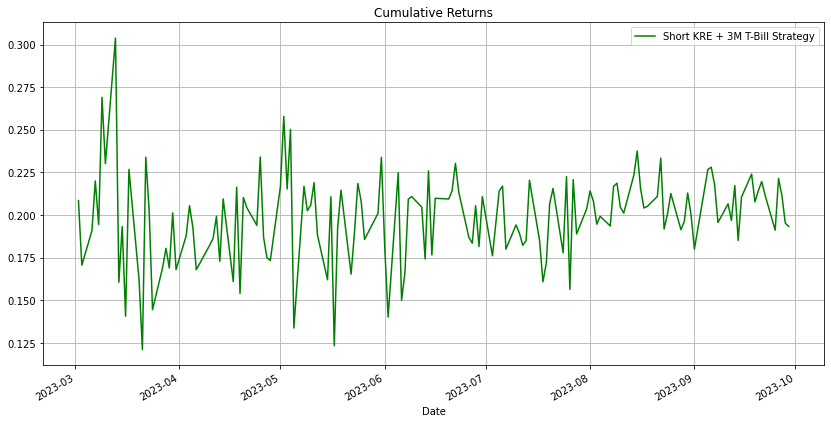

In [35]:
# Strategy:
# When you short, your return is the negative of the asset's return.
# When you invest in the T-bill, your return is the T-bill's return.
# Therefore, the daily strategy return is the sum of the negative KRE return and the T-bill return.
strategy_daily_return = -kre_daily_return + tbill_daily_return

# Calculate cumulative returns
# cumulative_kre = (1 + kre_daily_return).cumprod()
# cumulative_strategy = (1 + strategy_daily_return).cumprod()

# Plotting
plt.figure(figsize=(14,7))
# kre_daily_return.plot(label='KRE (Regional Bank Index)', color='blue')
strategy_daily_return.plot(label='Short KRE + 3M T-Bill Strategy', color='green')
plt.title('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()


In [36]:
len(strategy_daily_return)

148

In [37]:
sum(strategy_daily_return>0)

147

In [38]:
84/148

0.5675675675675675

In [39]:
strategy_daily_return.mean()

0.1986506069301111